# **Data Collection**

## Objectives

+ Answer business requirement 1:
    + The client is interested in discovering how the house attributes correlate with the sale price.

## Inputs



## Outputs


## Additional Comments

**Observation**


---

# Change working directory

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Project_05/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:

os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/Project_05'

# Load data

In [5]:
import pandas as pd
df = pd.read_csv(f"/workspace/Project_05/inputs/housing-prices-data/house-price-20211124T154130Z-001/house-price/house_prices_records.csv")
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


# Data Exploration

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<AxesSubplot:ylabel='Frequency'>

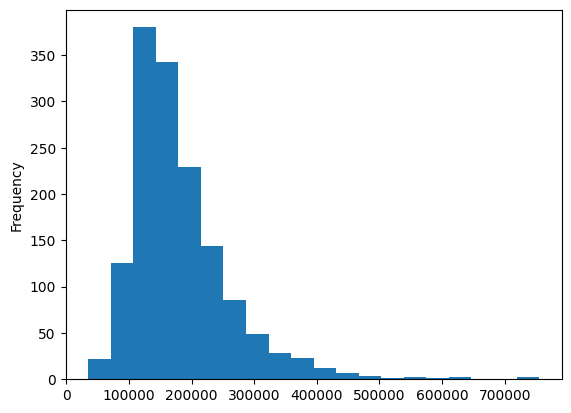

In [7]:
df.SalePrice.plot.hist(bins=20)

**Observation**

+ Normal distribution with outlier on the rightside
+ Will bin to allow for inspection of non-linear relationship

In [8]:
def binner(x):
  if x < 150000:
    return "low"
  elif x > 300000:
    return "high"
  else:
    return "medium"

In [9]:
df["SalePrice_bin"] = df["SalePrice"].apply(binner)

+ Using binner to able to catogorised the data, those are Low, high, and medium

<AxesSubplot:>

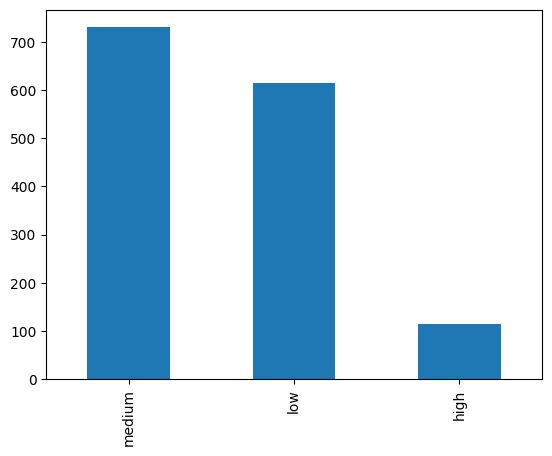

In [10]:
df.SalePrice_bin.value_counts().plot.bar()

In [11]:
df.SalePrice_bin.value_counts(normalize = True)

medium    0.500000
low       0.421233
high      0.078767
Name: SalePrice_bin, dtype: float64

**Observation**

+ Bucketize feature 50% in medium, 42% in Low, and 7,8% in High

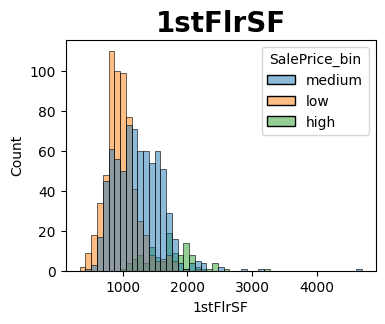

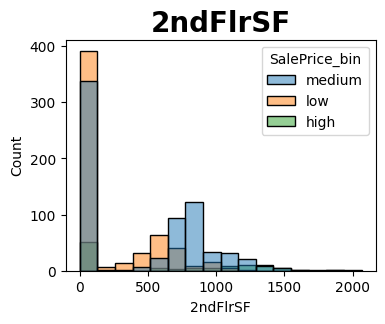

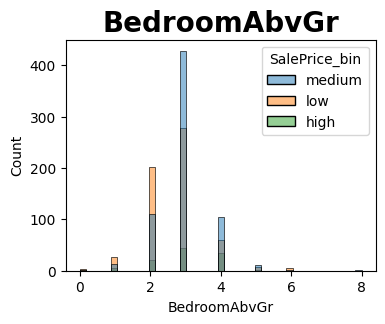

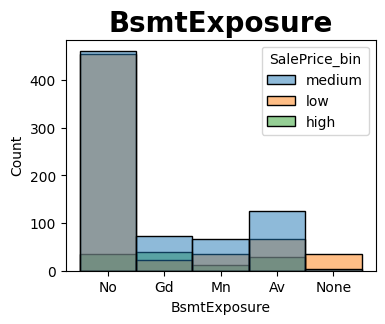

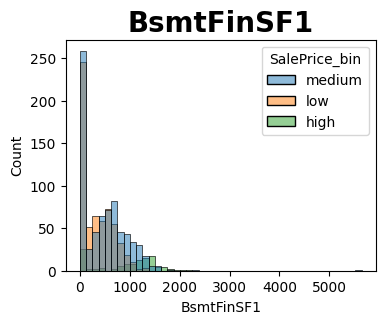

ConversionError: Failed to convert value(s) to axis units: 0       GLQ
1       ALQ
2       GLQ
3       ALQ
4       GLQ
       ... 
1455    Unf
1456    ALQ
1457    GLQ
1458    NaN
1459    BLQ
Name: x, Length: 1460, dtype: object

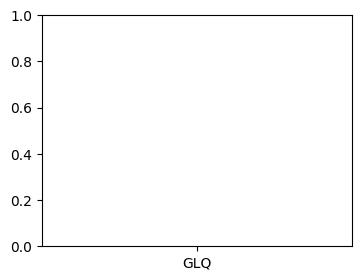

In [12]:
for feature in df.columns:
  plt.figure(figsize = (4,3))
  sns.histplot(data = df, x = feature, hue = "SalePrice_bin")
  plt.title(feature, fontsize = 20, fontweight = "bold")
  plt.show()